In [1]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
from Weather_API import getDataFromFile

In [2]:
#Get data from csvs
general,first = getDataFromFile()

In [3]:
#Make dataframe
specific = pd.DataFrame(first)
specific.dtypes

Zone       object
Time       object
Station    object
Temp       object
dtype: object

In [4]:

#Format time column
specific["Time"] = pd.to_datetime(specific["Time"], format='%Y-%m-%d %H:%M:%S')
specific.dtypes


Zone               object
Time       datetime64[ns]
Station            object
Temp               object
dtype: object

In [5]:
#Set the index to be time
specific = specific.set_index('Time')
specific

,Zone,Station,Temp
Time,,,
2021-08-03 17:59:00,MTZ138,LBHM8,25.556
2021-08-03 17:53:00,MTZ138,KSHR,26.1
2021-08-03 17:48:00,MTZ138,BRTM8,13.333
2021-08-03 17:29:00,MTZ138,HBOM8,23.889
2021-08-03 17:18:00,MTZ138,PMRM8,15
...,...,...,...
2021-07-27 18:29:00,MTZ138,HBOM8,35.556
2021-07-27 18:18:00,MTZ138,PMRM8,31.111
2021-07-27 18:18:00,MTZ138,WWMM8,35


In [6]:
#Remove any non-Float
specific.drop(specific[specific['Temp'] == "Not given"].index, inplace = True)
specific['Temp'] = specific['Temp'].astype(float)
specific.dtypes

Zone        object
Station     object
Temp       float64
dtype: object

<AxesSubplot:xlabel='Time', ylabel='Temperature'>

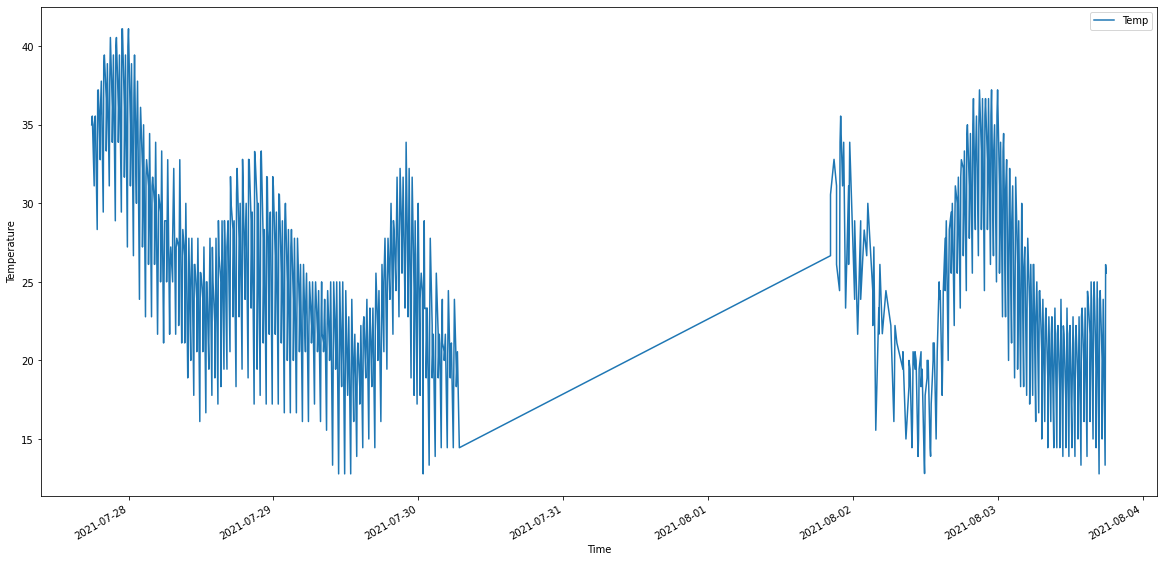

In [7]:
specific.plot(ylabel="Temperature",figsize=(20,10))

In [8]:
len(specific)

609

<AxesSubplot:xlabel='Time', ylabel='Temperature'>

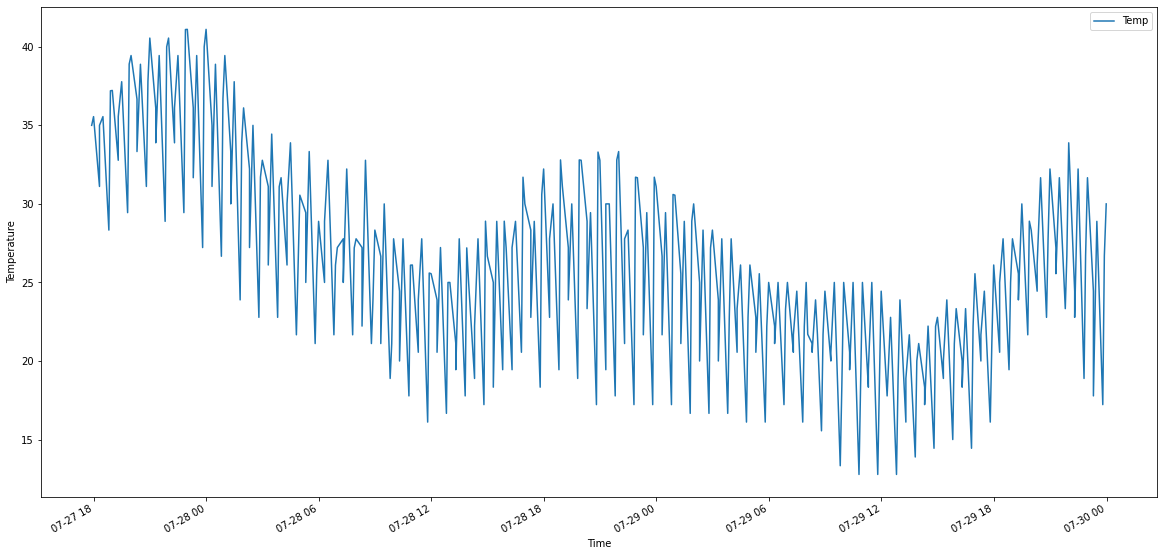

In [9]:
specific['2021-07-30':'2021-07-26'].plot(ylabel="Temperature",figsize=(20,10))

In [10]:
specific['Station'].value_counts()

KSHR     105
WWMM8    105
PMRM8    103
BRTM8    100
HBOM8    100
LBHM8     96
Name: Station, dtype: int64

<AxesSubplot:xlabel='Time', ylabel='Temperature'>

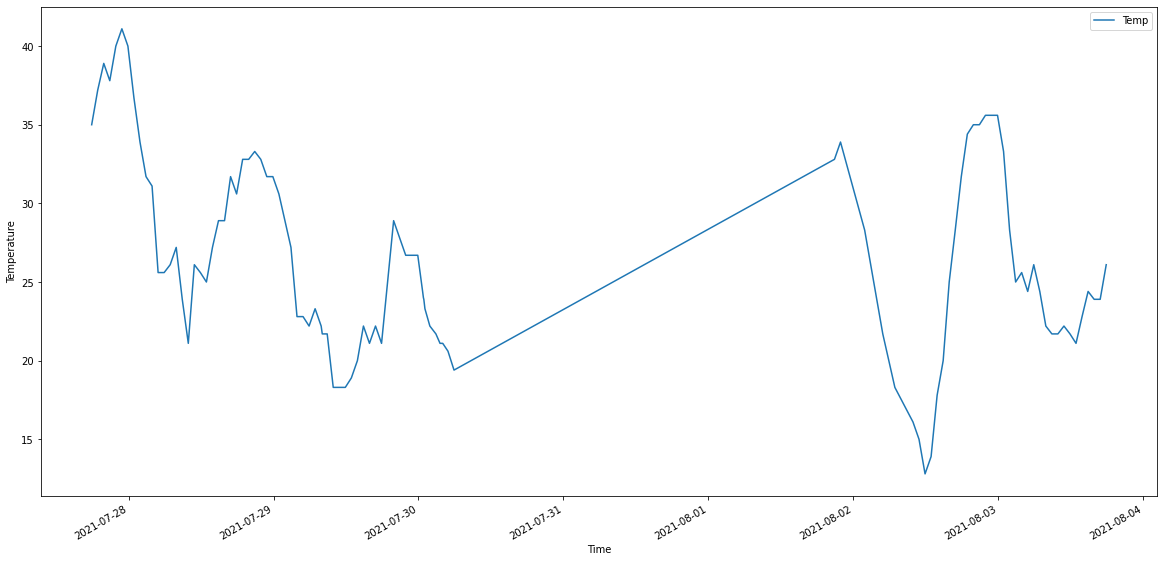

In [11]:
specific[specific['Station'] == "KSHR"].plot(ylabel="Temperature",figsize=(20,10))

<AxesSubplot:xlabel='Time', ylabel='Temperature'>

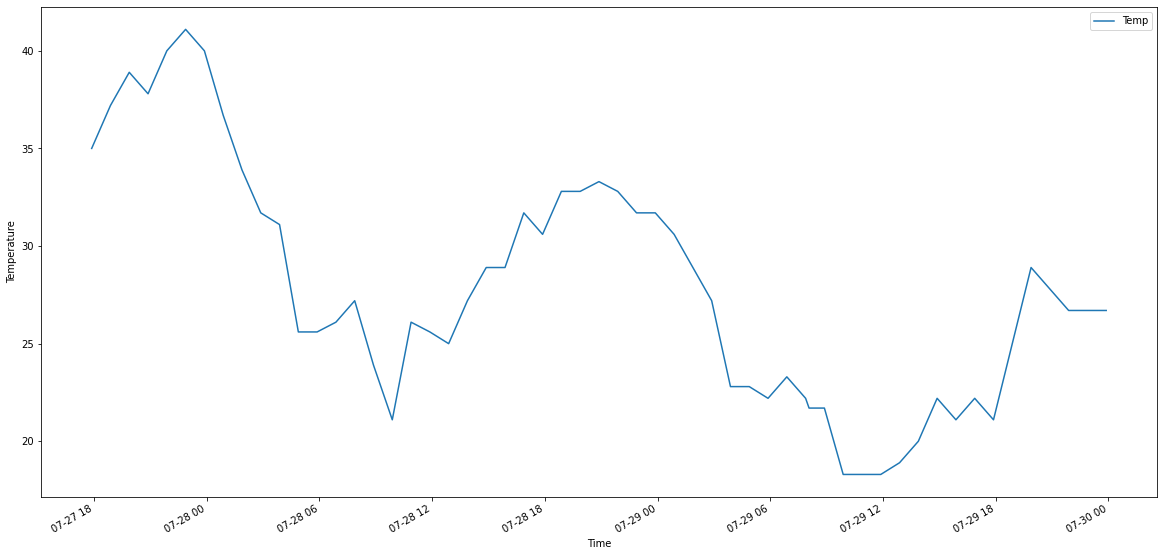

In [12]:
specific_date = specific['2021-07-30':'2021-07-26']
specific_date[specific_date['Station'] == "KSHR"].plot(ylabel="Temperature",figsize=(20,10))

<AxesSubplot:xlabel='Time', ylabel='Temperature'>

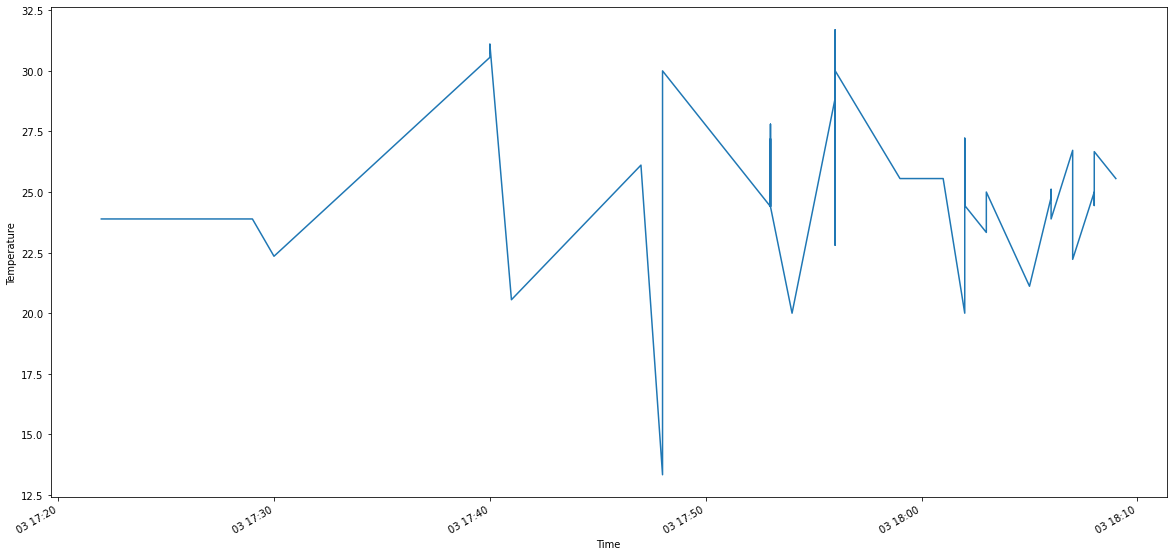

In [13]:
all_data = pd.DataFrame(general)
all_data["Time"] = pd.to_datetime(all_data["Time"], format='%Y-%m-%d %H:%M:%S')
all_data = all_data.set_index('Time')
all_data.drop(all_data[all_data['Temp'] == "Not given"].index, inplace = True)
all_data['Temp'] = all_data['Temp'].astype(float)
all_data['Temp'].plot(ylabel="Temperature",figsize=(20,10))

<AxesSubplot:xlabel='Time', ylabel='Temperature'>

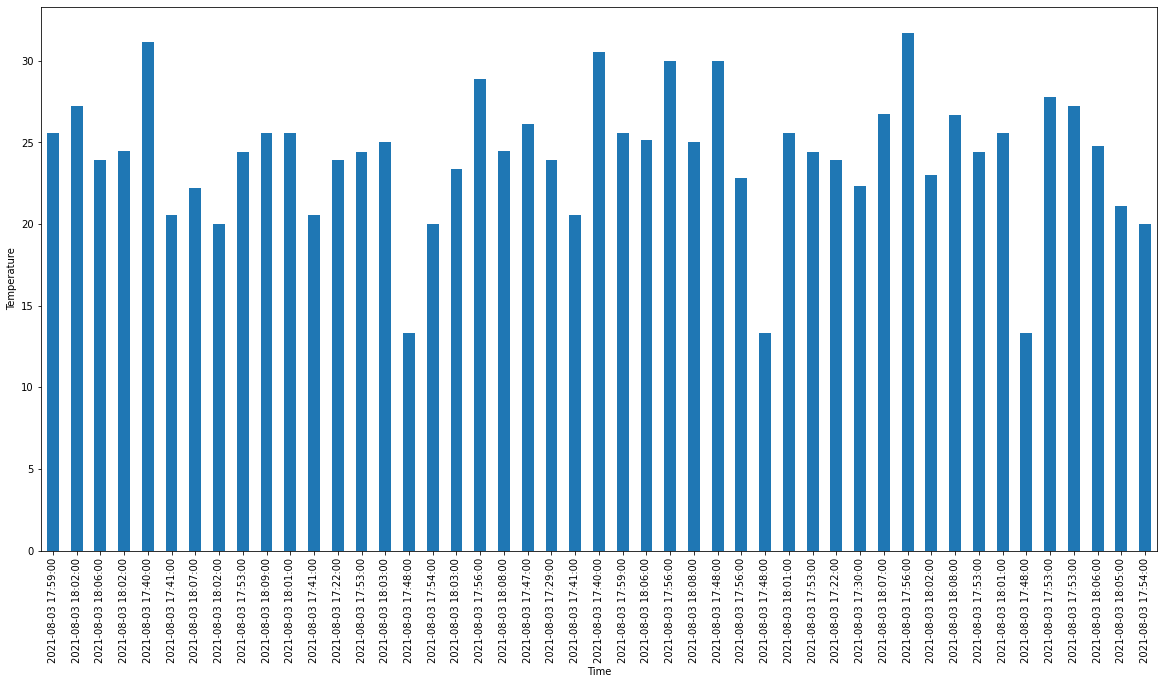

In [14]:
all_data['Temp'].plot(ylabel="Temperature",figsize=(20,10),kind="bar")

<AxesSubplot:xlabel='Zone', ylabel='Temperature'>

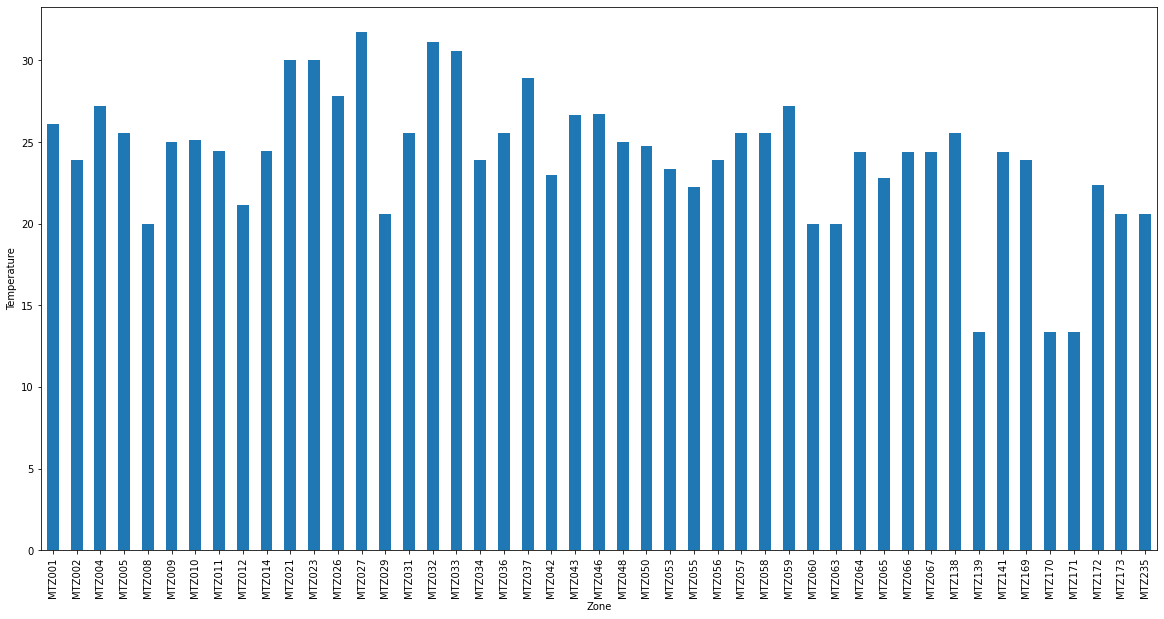

In [15]:
all_data = all_data.reset_index()
all_data = all_data.set_index("Zone")
all_data = all_data.sort_index()
all_data['Temp'].plot(ylabel="Temperature",figsize=(20,10),kind="bar")

In [16]:
all_data.index.value_counts()[:5]

MTZ029    1
MTZ021    1
MTZ057    1
MTZ055    1
MTZ050    1
Name: Zone, dtype: int64

In [17]:
all_data['Station'].value_counts()[:10]

KLVM     4
BRTM8    3
STBM8    3
BAFM8    3
KLWT     2
FSLM8    2
LBHM8    2
KMLS     1
KBZN     1
KTFM8    1
Name: Station, dtype: int64

In [18]:
len(all_data)

47

In [19]:
all_data = all_data.drop_duplicates(subset=['Station'])
len(all_data)

35

<AxesSubplot:xlabel='Zone', ylabel='Temperature'>

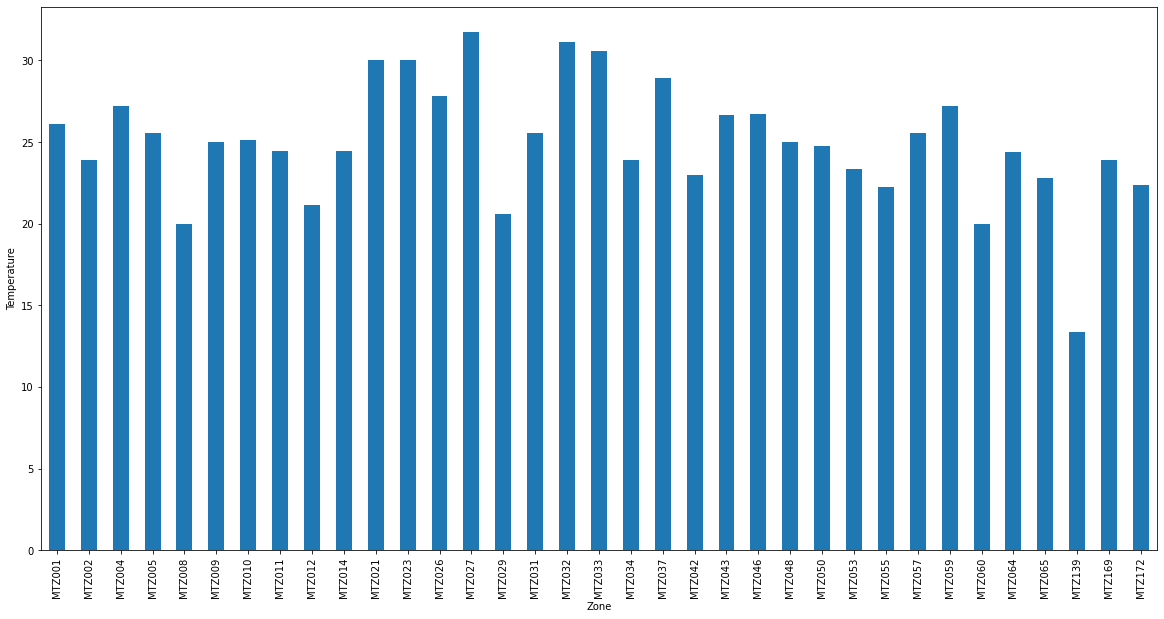

In [20]:
all_data['Temp'].plot(ylabel="Temperature",figsize=(20,10),kind="bar")